<a href="https://colab.research.google.com/github/mwierciszewska/TensorFlow_lab/blob/main/NLP_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Natural Language Processing with Disaster Tweets**

Using different models, pre-trained Embeddings (Universal Sentence Encoder) and ensemble



In [13]:
#download Disaster Tweets dataset (text data)

In [14]:
!wget https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/disaster_tweets_dataset/sample_submission.csv
!wget https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/disaster_tweets_dataset/test.csv
!wget https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/disaster_tweets_dataset/train.csv

--2025-03-27 09:17:28--  https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/disaster_tweets_dataset/sample_submission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22746 (22K) [text/plain]
Saving to: ‘sample_submission.csv.1’

sample_submission.c 100%[===================>]  22.21K  --.-KB/s    in 0.002s  

2025-03-27 09:17:28 (13.8 MB/s) - ‘sample_submission.csv.1’ saved [22746/22746]

--2025-03-27 09:17:28--  https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/disaster_tweets_dataset/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [15]:
import os

In [16]:
if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/mwierciszewska/TensorFlow_lab/refs/heads/main/extras/helper_functions.py
else:
  print(" 'helepr_function.py' already exists.")

 'helepr_function.py' already exists.


In [17]:
import pandas as pd

In [18]:
train_df = pd.read_csv('train.csv')

In [19]:
test_df = pd.read_csv('test.csv')

In [20]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [21]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [22]:
train_df_shuffled = train_df.sample(frac=1)
train_df_shuffled.head(10)

,id,keyword,location,text,target
7377,10560,windstorm,"Jakarta, Indonesia",Texas Seeks Comment on Rules for Changes to Wi...,0
5797,8274,rioting,NaN,RT : Why Sweden Isn't Venezuela: There have be...,1
2077,2983,dead,"Sochi, KDA, RU",@hlportal Hello! I'm looking for mod Cold Ice....,0
247,352,annihilation,Wild Wild Web,annihilating quarterstaff of annihilation,1
2753,3956,devastation,NaN,70 Years After Atomic Bombs Japan Still Strugg...,1
4523,6427,hurricane,NaN,#kick #hurricane Seriously #simple websites: h...,1
6431,9197,suicide%20bombing,England,Suicide bombing for Da'esh is (rightly) despic...,1
151,216,airplane%20accident,Somewhere Out There,Experts in France begin examining airplane deb...,1
5695,8128,rescued,NaN,Young children among those rescued from capsiz...,1
986,1431,body%20bagging,"Sydney, New South Wales",@ohmyloz @RondaRousey who is bagging her body ...,0


In [23]:
train_df_shuffled['target'].value_counts()

,count
target,
0,4342
1,3271


In [24]:
#visualize random training data

In [25]:
import random

In [26]:
random_index = random.randint(0, len(train_df)-10)

In [27]:
for row in train_df_shuffled[['text', 'target']][random_index:random_index+10].itertuples():
  id, text,target = row
  print(f"Target: {target}", "(disaster)" if target > 0 else "(not disaster)")
  print(f"Text:\n{text}\n")
  print("********************\n")


Target: 0 (not disaster)
Text:
I've been bleeding in your silence 
I feel safer in your violence .

********************

Target: 1 (disaster)
Text:
@AsimTanvir @NemesisK_PES @KevR_7  Snow? Thunder and lightning?

********************

Target: 1 (disaster)
Text:
SoloQuiero Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames: Firefighte...

********************

Target: 0 (not disaster)
Text:
@PBohanna Probably a dead boring 1st hour and a half after the pandemonium of the last Test..... #justaguess

********************

Target: 1 (disaster)
Text:
watching it go up in flames

********************

Target: 1 (disaster)
Text:
Calgary Transit reviewing policy after leaving hundreds of commuters stranded during hailÛ_ http://t.co/fT7OrfA52y http://t.co/Dv4MMlsO1I

********************

Target: 1 (disaster)
Text:
Destruction magic's fine just don't go burning down any buildings.

********************

Target: 1 (disaster)
Text:
@Kir

In [28]:
#create validation dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_data, val_data, train_labels, val_labels = train_test_split(train_df_shuffled['text'],
                                                                  train_df_shuffled['target'],
                                                                  test_size=0.1)

In [31]:
#convert text data into numbers

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [33]:
avg_words = round(sum([len(i.split()) for i in train_data])/len(train_data))

In [34]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                      standardize='lower_and_strip_punctuation',
                                      split='whitespace',
                                      ngrams=None,
                                      output_mode='int',
                                      output_sequence_length=avg_words)

In [35]:
text_vectorizer.adapt(train_data)

In [36]:
sample_sentence = "It is a very big disaster!!!"

In [37]:
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 16,   9,   3, 444, 350,  75,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [38]:
import numpy as np

In [39]:
random_sentence = random.choice(np.array(train_data))

In [40]:
print(f"Original text: {random_sentence}\nVectorized version: {text_vectorizer([random_sentence])}")

Original text: According to prophecy and also CNN a Mac tablet will completely obliterate the need for other gadgets. CombiningÛ_ http://t.co/xfccvMXuWb
Vectorized version: [[1932    4 9555    7  267  864    3 2380 1246   40 1701  558    2  153
    10]]


In [41]:
vocabulary = text_vectorizer.get_vocabulary()

In [42]:
#top 10
vocabulary[:10]

['', '[UNK]', 'the', 'a', 'to', 'in', 'of', 'and', 'i', 'is']

In [43]:
#bottom 10
vocabulary[-10:]

['parks',
 'parked',
 'parkchat',
 'paris',
 'parentsacrossam',
 'parental',
 'parent',
 'pardon',
 'parched',
 'paratroopers']

In [44]:
#create embedding

In [45]:
from tensorflow.keras import layers

In [46]:
embedding = layers.Embedding(input_dim=10000,
                             output_dim=64,
                             embeddings_initializer='uniform',
                             name='embedding')

In [47]:
embedding

In [48]:
random_embed = embedding(text_vectorizer([random_sentence]))

In [49]:
random_sentence

'According to prophecy and also CNN a Mac tablet will completely obliterate the need for other gadgets. Combining\x89Û_ http://t.co/xfccvMXuWb'

In [50]:
random_embed[0][0]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([-0.0491694 ,  0.00378788, -0.04582822, -0.00723429,  0.02961043,
       -0.04147162,  0.01908412,  0.01805825, -0.03620686,  0.02094022,
        0.04714457,  0.01006132, -0.0086261 , -0.01100152, -0.02596872,
        0.02398295, -0.03124717,  0.04317117, -0.00783409, -0.03903843,
        0.04583157, -0.04198182,  0.03909617,  0.01269759, -0.02074003,
       -0.01004336, -0.01900061,  0.03720686,  0.02934359, -0.04818455,
        0.00151677,  0.01650394,  0.01295635, -0.01351742,  0.03908615,
        0.03660098,  0.00392212, -0.04729694,  0.01052697, -0.02406126,
        0.01579856,  0.04710801, -0.02710911,  0.01133401, -0.02197906,
        0.02049439, -0.02552102,  0.02738669, -0.02423098, -0.03907248,
        0.02226451,  0.00740198,  0.01192277,  0.01403631, -0.01755821,
       -0.0077249 ,  0.02571198, -0.03521943, -0.02921485,  0.01127069,
       -0.0365731 ,  0.04491745, -0.03114328,  0.02087266], dtype=float32)>

In [51]:
#build a baseline model

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [53]:
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [54]:
model_0.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [55]:
baseline_pred = model_0.predict(val_data)

In [56]:
baseline_pred[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [57]:
#create evaluate function for checking results

In [58]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [59]:
def create_model_results(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': accuracy,
                   'preciscion': precision,
                   'recall': recall,
                   'f1-score': f1_score}
  return model_results

In [60]:
baseline_results = create_model_results(val_labels, baseline_pred)

In [61]:
baseline_results

{'accuracy': 0.8136482939632546,
 'preciscion': 0.8373226706036745,
 'recall': 0.8136482939632546,
 'f1-score': 0.8081090750215468}

In [62]:
#model_1

In [63]:
from tensorflow.keras import layers

In [295]:
embedding_1 = layers.Embedding(input_dim=10000,
                             output_dim=64,
                             embeddings_initializer='uniform',
                             name='embedding_1')

In [296]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding_1(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [297]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [298]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 15, 64)            640000    
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 640065 (2.44 MB)
Trainable params: 6400

In [67]:
train_data = train_data.astype(str).to_numpy()
val_data = val_data.astype(str).to_numpy()

In [299]:
history_model_1 = model_1.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels), )

Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.6335 - accuracy: 0.6691 - val_loss: 0.5694 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4918 - accuracy: 0.7974 - val_loss: 0.4697 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3971 - accuracy: 0.8394 - val_loss: 0.4376 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3347 - accuracy: 0.8664 - val_loss: 0.4300 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2883 - accuracy: 0.8921 - val_loss: 0.4322 - val_accuracy: 0.8084


In [300]:
model_1.evaluate(val_data, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8084


[0.43223801255226135, 0.808398962020874]

In [301]:
model_1_pred_probs = model_1.predict(val_data)

24/24 [==============================] - 0s 2ms/step


In [302]:
model_1_pred_probs.shape

(762, 1)

In [303]:
model_1_pred_probs[:10]

array([[0.06156215],
       [0.2213359 ],
       [0.936729  ],
       [0.31405663],
       [0.98757374],
       [0.1877758 ],
       [0.06870788],
       [0.01554806],
       [0.9811126 ],
       [0.35604846]], dtype=float32)

In [304]:
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))

In [305]:
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)>

In [306]:
model_1_results = create_model_results(val_labels, model_1_pred)

In [307]:
model_1_results

{'accuracy': 0.8083989501312336,
 'preciscion': 0.8130104525877542,
 'recall': 0.8083989501312336,
 'f1-score': 0.806510605760541}

In [77]:
baseline_results

{'accuracy': 0.8136482939632546,
 'preciscion': 0.8373226706036745,
 'recall': 0.8136482939632546,
 'f1-score': 0.8081090750215468}

In [78]:
import numpy as np

In [79]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [80]:
embedding_weights = model_1.get_layer('embedding').get_weights()[0]

In [81]:
print(embedding_weights.shape)

(10000, 64)


In [82]:
#LSTM model

In [308]:
embedding_2 = layers.Embedding(input_dim=10000,
                             output_dim=64,
                             embeddings_initializer='uniform',
                             name='embedding_2')

In [309]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding_2(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='LSTM_model')

In [310]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [311]:
history_model_2 = model_2.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
215/215 [==============================] - 22s 43ms/step - loss: 0.5181 - accuracy: 0.7392 - val_loss: 0.4228 - val_accuracy: 0.8097
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3260 - accuracy: 0.8663 - val_loss: 0.4602 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2308 - accuracy: 0.9114 - val_loss: 0.5285 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1771 - accuracy: 0.9388 - val_loss: 0.5810 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1367 - accuracy: 0.9556 - val_loss: 0.7790 - val_accuracy: 0.7730


In [312]:
model_2_pred_probs = model_2.predict(val_data)

24/24 [==============================] - 1s 6ms/step


In [313]:
model_2_pred_probs[:10]

array([[0.00185013],
       [0.00206039],
       [0.9993695 ],
       [0.10611109],
       [0.9994741 ],
       [0.35039684],
       [0.00323379],
       [0.00145891],
       [0.9995109 ],
       [0.09153562]], dtype=float32)

In [314]:
model_2_pred = tf.squeeze(tf.round(model_2_pred_probs))

In [315]:
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)>

In [316]:
model_2_results = create_model_results(val_labels, model_2_pred)

In [317]:
model_2_results

{'accuracy': 0.7729658792650919,
 'preciscion': 0.774124152700235,
 'recall': 0.7729658792650919,
 'f1-score': 0.7716906136634767}

In [92]:
baseline_results

{'accuracy': 0.8136482939632546,
 'preciscion': 0.8373226706036745,
 'recall': 0.8136482939632546,
 'f1-score': 0.8081090750215468}

In [93]:
#GRU model

In [318]:
embedding_3 = layers.Embedding(input_dim=10000,
                             output_dim=64,
                             embeddings_initializer='uniform',
                             name='embedding_3')

In [319]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding_3(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [320]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [321]:
model_3_history = model_3.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 39ms/step - loss: 0.5346 - accuracy: 0.7237 - val_loss: 0.4379 - val_accuracy: 0.8123
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3300 - accuracy: 0.8580 - val_loss: 0.4635 - val_accuracy: 0.8005
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.2265 - accuracy: 0.9143 - val_loss: 0.5589 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1690 - accuracy: 0.9413 - val_loss: 0.5910 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1342 - accuracy: 0.9566 - val_loss: 0.5762 - val_accuracy: 0.7651


In [322]:
model_3_pred_probs = model_3.predict(val_data)

24/24 [==============================] - 1s 5ms/step


In [323]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))

In [324]:
model_3_results = create_model_results(val_labels, model_3_pred)

In [325]:
model_3_results

{'accuracy': 0.7650918635170604,
 'preciscion': 0.7661103055550473,
 'recall': 0.7650918635170604,
 'f1-score': 0.7653047090945329}

In [101]:
baseline_results

{'accuracy': 0.8136482939632546,
 'preciscion': 0.8373226706036745,
 'recall': 0.8136482939632546,
 'f1-score': 0.8081090750215468}

In [102]:
#Bidirectional RNN model

In [181]:
embedding_bi = layers.Embedding(input_dim=10000, output_dim=64, name='embedding_bi')

In [182]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding_bi(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='bidirectional_model')

In [183]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [184]:
history_model_4 = model_4.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
215/215 [==============================] - 21s 54ms/step - loss: 0.5119 - accuracy: 0.7427 - val_loss: 0.4329 - val_accuracy: 0.8136
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.3196 - accuracy: 0.8707 - val_loss: 0.4465 - val_accuracy: 0.8005
Epoch 3/5
215/215 [==============================] - 9s 44ms/step - loss: 0.2137 - accuracy: 0.9215 - val_loss: 0.5650 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.1519 - accuracy: 0.9505 - val_loss: 0.6675 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 10s 44ms/step - loss: 0.1132 - accuracy: 0.9644 - val_loss: 0.6996 - val_accuracy: 0.7769


In [185]:
model_4_pred_probs = model_4.predict(val_data)

24/24 [==============================] - 2s 9ms/step


In [186]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))

In [187]:
model_4_results = create_model_results(val_labels, model_4_pred)

In [188]:
model_4_results

{'accuracy': 0.7769028871391076,
 'preciscion': 0.7767749828595095,
 'recall': 0.7769028871391076,
 'f1-score': 0.7764940801690142}

In [110]:
#Conv1D model

In [111]:
embedding_text = embedding(text_vectorizer(['This is not a disaster']))

In [112]:
conv1d = layers.Conv1D(64, kernel_size=5, activation='relu')
conv1d_outputs = conv1d(embedding_text)
max_pool = layers.GlobalMaxPool1D()
max_pool_outputs = max_pool(conv1d_outputs)

In [113]:
embedding_text.shape

TensorShape([1, 15, 64])

In [114]:
conv1d_outputs.shape

TensorShape([1, 11, 64])

In [115]:
max_pool_outputs.shape

TensorShape([1, 64])

In [326]:
embedding_5 = layers.Embedding(input_dim=10000,
                             output_dim=64,
                             embeddings_initializer='uniform',
                             name='embedding_5')

In [327]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding_5(x)
x = layers.Conv1D(64, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='conv1d_model')

In [328]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [329]:
history_model_5 = model_5.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.5779 - accuracy: 0.6960 - val_loss: 0.4341 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3550 - accuracy: 0.8501 - val_loss: 0.4337 - val_accuracy: 0.8228
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2267 - accuracy: 0.9153 - val_loss: 0.4889 - val_accuracy: 0.8045
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1505 - accuracy: 0.9488 - val_loss: 0.5700 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1073 - accuracy: 0.9635 - val_loss: 0.6517 - val_accuracy: 0.7874


In [330]:
model_5_preds_prob = model_5.predict(val_data)

24/24 [==============================] - 0s 2ms/step


In [331]:
model_5_pred = tf.squeeze(tf.round(model_5_preds_prob))

In [332]:
model_5_results = create_model_results(val_labels, model_5_pred)

In [333]:
model_5_results

{'accuracy': 0.7874015748031497,
 'preciscion': 0.7884710804430077,
 'recall': 0.7874015748031497,
 'f1-score': 0.7863430081972196}

In [334]:
def compare_results(baseline_results, new_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_results[key]:.2f}, Difference: {new_results[key]-value:.2f}")

In [335]:
compare_results(baseline_results, model_5_results)

Baseline accuracy: 0.81, New accuracy: 0.79, Difference: -0.03
Baseline preciscion: 0.84, New preciscion: 0.79, Difference: -0.05
Baseline recall: 0.81, New recall: 0.79, Difference: -0.03
Baseline f1-score: 0.81, New f1-score: 0.79, Difference: -0.02


In [125]:
#Using pre-trained embeddings

In [126]:
import tensorflow as tf

In [127]:
import tensorflow_hub as hub

In [128]:
embedding_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                   input_shape=[],
                                   dtype=tf.string,
                                   name='USE')

In [129]:
inputs = tf.keras.Input(shape=(), dtype=tf.string)
x = embedding_encoder_layer(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_6 = tf.keras.Model(inputs=inputs, outputs=outputs, name="USE_model")

In [130]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [131]:
history_model_6 = model_6.fit(train_data, train_labels, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
215/215 [==============================] - 7s 13ms/step - loss: 0.5079 - accuracy: 0.7793 - val_loss: 0.4186 - val_accuracy: 0.8241
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4176 - accuracy: 0.8119 - val_loss: 0.4087 - val_accuracy: 0.8241
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4025 - accuracy: 0.8228 - val_loss: 0.4064 - val_accuracy: 0.8255
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3939 - accuracy: 0.8260 - val_loss: 0.4032 - val_accuracy: 0.8294
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3860 - accuracy: 0.8297 - val_loss: 0.4034 - val_accuracy: 0.8268


In [132]:
model_6.summary()

Model: "USE_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [133]:
model_6_pred_probs = model_6.predict(val_data)

24/24 [==============================] - 2s 18ms/step


In [134]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))

In [135]:
model_6_results = create_model_results(val_labels, model_6_pred)

In [136]:
model_6_results

{'accuracy': 0.8267716535433071,
 'preciscion': 0.8273620392575611,
 'recall': 0.8267716535433071,
 'f1-score': 0.8262367601846587}

In [137]:
compare_results(baseline_results, model_6_results)

Baseline accuracy: 0.81, New accuracy: 0.83, Difference: 0.01
Baseline preciscion: 0.84, New preciscion: 0.83, Difference: -0.01
Baseline recall: 0.81, New recall: 0.83, Difference: 0.01
Baseline f1-score: 0.81, New f1-score: 0.83, Difference: 0.02


In [139]:
#Using USE but with 10% of training data

In [143]:
train_data_90prc, train_data_10prc, train_labels_90prc, train_labels_10prc = train_test_split( train_data, train_labels, test_size=0.1)

In [144]:
len(train_data), len(train_data_90prc), len(train_data_10prc)

(6851, 6165, 686)

In [146]:
train_labels_10prc.value_counts()

,count
target,
0,401
1,285


In [147]:
model_7 = tf.keras.models.clone_model(model_6)

In [151]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [152]:
model_7.summary()

Model: "USE_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [156]:
history_model_7 = model_7.fit(train_data_10prc, train_labels_10prc, epochs=5, validation_data=(val_data, val_labels))

Epoch 1/5
22/22 [==============================] - 7s 94ms/step - loss: 0.6783 - accuracy: 0.6589 - val_loss: 0.6603 - val_accuracy: 0.7231
Epoch 2/5
22/22 [==============================] - 1s 50ms/step - loss: 0.6224 - accuracy: 0.8032 - val_loss: 0.6052 - val_accuracy: 0.7743
Epoch 3/5
22/22 [==============================] - 1s 48ms/step - loss: 0.5536 - accuracy: 0.8163 - val_loss: 0.5382 - val_accuracy: 0.8084
Epoch 4/5
22/22 [==============================] - 1s 39ms/step - loss: 0.4871 - accuracy: 0.8353 - val_loss: 0.4933 - val_accuracy: 0.8058
Epoch 5/5
22/22 [==============================] - 1s 35ms/step - loss: 0.4379 - accuracy: 0.8309 - val_loss: 0.4674 - val_accuracy: 0.8071


In [157]:
model_7_pred_probs = model_7.predict(val_data)

24/24 [==============================] - 1s 16ms/step


In [158]:
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))

In [159]:
model_7_results = create_model_results(val_labels, model_7_pred)

In [160]:
model_7_results

{'accuracy': 0.8070866141732284,
 'preciscion': 0.8071337549259616,
 'recall': 0.8070866141732284,
 'f1-score': 0.8067052439751797}

In [161]:
compare_results(baseline_results, model_7_results)

Baseline accuracy: 0.81, New accuracy: 0.81, Difference: -0.01
Baseline preciscion: 0.84, New preciscion: 0.81, Difference: -0.03
Baseline recall: 0.81, New recall: 0.81, Difference: -0.01
Baseline f1-score: 0.81, New f1-score: 0.81, Difference: -0.00


In [162]:
#comparing all models

In [336]:
all_results = pd.DataFrame({"baseline": baseline_results,
                            "simple_dense": model_1_results,
                            "lstm": model_2_results,
                            "gru": model_3_results,
                            "bidirectional": model_4_results,
                            "conv1d": model_5_results,
                            "USE": model_6_results,
                            "USE_10prc_data": model_7_results})

In [337]:
all_results

,baseline,simple_dense,lstm,gru,bidirectional,conv1d,USE,USE_10prc_data
accuracy,0.813648,0.808399,0.772966,0.765092,0.776903,0.787402,0.826772,0.807087
preciscion,0.837323,0.813010,0.774124,0.766110,0.776775,0.788471,0.827362,0.807134
recall,0.813648,0.808399,0.772966,0.765092,0.776903,0.787402,0.826772,0.807087
f1-score,0.808109,0.806511,0.771691,0.765305,0.776494,0.786343,0.826237,0.806705


In [338]:
all_results = all_results.transpose()

In [339]:
all_results

,accuracy,preciscion,recall,f1-score
baseline,0.813648,0.837323,0.813648,0.808109
simple_dense,0.808399,0.813010,0.808399,0.806511
lstm,0.772966,0.774124,0.772966,0.771691
gru,0.765092,0.766110,0.765092,0.765305
bidirectional,0.776903,0.776775,0.776903,0.776494
conv1d,0.787402,0.788471,0.787402,0.786343
USE,0.826772,0.827362,0.826772,0.826237
USE_10prc_data,0.807087,0.807134,0.807087,0.806705


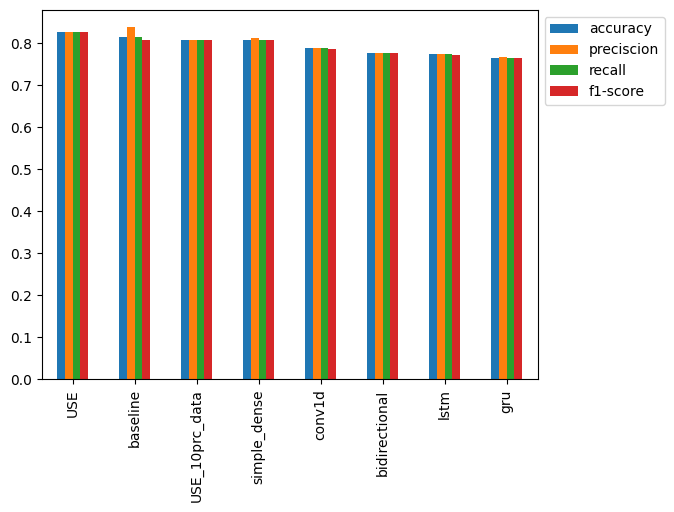

In [340]:
all_results.sort_values('f1-score', ascending=False).plot(kind='bar').legend(bbox_to_anchor=(1.0, 1.0))

In [194]:
#model ensebmling/stacking

In [253]:
#combine models: USE, baseline , lstm

In [341]:
baseline_pred_probs = model_0.predict_proba(val_data)

In [342]:
baseline_pred_probs = baseline_pred_probs[:,1]

In [343]:
ensemble_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs) + tf.squeeze(model_6_pred_probs)

In [344]:
ensemble_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.4298373 , 0.7982924 , 2.432599  , 0.3674777 , 2.8734088 ,
       0.59562826, 0.36715937, 0.1811485 , 2.6398335 , 0.44882685],
      dtype=float32)>

In [345]:
ensemble_preds = tf.round(ensemble_pred_probs/3)

In [346]:
ensemble_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)>

In [347]:
ensemble_results = create_model_results(val_labels, ensemble_preds)

In [348]:
ensemble_results

{'accuracy': 0.821522309711286,
 'preciscion': 0.8279728648928744,
 'recall': 0.821522309711286,
 'f1-score': 0.8194504335576277}

In [349]:
compare_results(model_6_results, ensemble_results)

Baseline accuracy: 0.83, New accuracy: 0.82, Difference: -0.01
Baseline preciscion: 0.83, New preciscion: 0.83, Difference: 0.00
Baseline recall: 0.83, New recall: 0.82, Difference: -0.01
Baseline f1-score: 0.83, New f1-score: 0.82, Difference: -0.01


In [350]:
all_results.loc['ensemble'] = ensemble_results

In [351]:
all_results

,accuracy,preciscion,recall,f1-score
baseline,0.813648,0.837323,0.813648,0.808109
simple_dense,0.808399,0.813010,0.808399,0.806511
lstm,0.772966,0.774124,0.772966,0.771691
gru,0.765092,0.766110,0.765092,0.765305
bidirectional,0.776903,0.776775,0.776903,0.776494
conv1d,0.787402,0.788471,0.787402,0.786343
USE,0.826772,0.827362,0.826772,0.826237
USE_10prc_data,0.807087,0.807134,0.807087,0.806705
ensemble,0.821522,0.827973,0.821522,0.819450


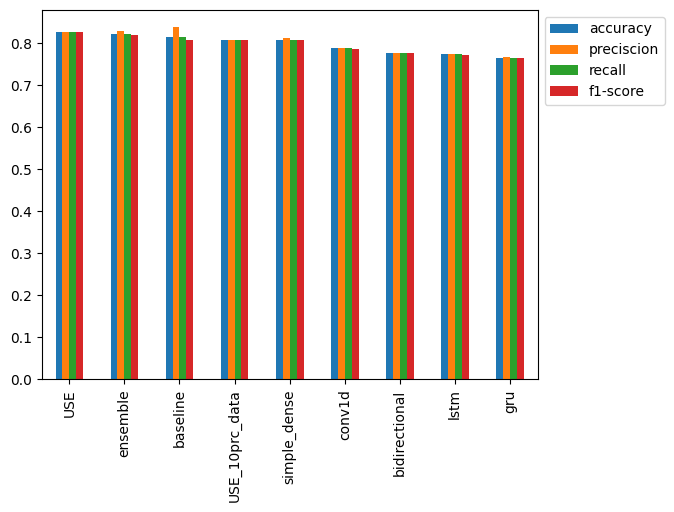

In [352]:
all_results.sort_values('f1-score', ascending=False).plot(kind='bar').legend(bbox_to_anchor=(1.0,1.0))

In [353]:
#USE model still is the best

In [255]:
#save model

In [260]:
model_6.save('model_USE')

In [261]:
loaded_model = tf.keras.models.load_model('model_USE')

In [262]:
loaded_model.summary()

Model: "USE_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [263]:
#finding the most wrong prediction

In [264]:
validation_data = pd.DataFrame({'text': val_data,
                                'target': val_labels,
                                'pred': model_6_pred,
                                'prob': tf.squeeze(model_6_pred_probs)})

In [265]:
validation_data.head(10)

,text,target,pred,prob
1915,@keampurley thirst has no curfew,0,0.0,0.223747
2336,This sale and demolition trend near Metrotown ...,0,0.0,0.476081
4395,The Murderous Story Of AmericaÛªs First Hijac...,1,1.0,0.845168
6684,The one thing I like about here is thunder .. ...,0,0.0,0.072261
3604,11-Year-Old Boy Charged With Manslaughter of T...,1,1.0,0.946078
2544,destroy the free fandom honestly,1,0.0,0.062550
2607,Black Eye 9: A space battle occurred at Star O...,0,0.0,0.302168
7007,TWISTER DANCE Game Dance Console Instructions...,0,0.0,0.064072
2720,Obama declares disaster for typhoon-devastated...,1,1.0,0.698027
6103,that horrible sinking feeling when youÛªve be...,0,0.0,0.272299


In [269]:
wrong_predictions = validation_data[validation_data['target'] != validation_data['pred']].sort_values('prob', ascending=False)

In [271]:
#top most wrong
wrong_predictions.head(10)

,text,target,pred,prob
2877,Large rain drops falling in Rock Hill off Ande...,0,1.0,0.946128
425,Video Captures Man Removing American Flag From...,0,1.0,0.929332
6257,Snowstorm planned outside #Rome's St Mary Majo...,0,1.0,0.921821
223,One thing for sure-God has promised Israel wil...,0,1.0,0.913095
1358,if firefighters acted like cops they'd drive a...,0,1.0,0.907252
3506,The government is concerned about the populati...,0,1.0,0.888268
3821,Juneau Empire - First responders turn out for ...,0,1.0,0.883003
2221,@StephanieMarija 'light rain' was the forecast...,0,1.0,0.880713
1673,That sounds about right. Our building will hav...,0,1.0,0.878338
2613,How can we help save a beautiful town in Ontar...,0,1.0,0.865568


In [272]:
for row in wrong_predictions[:10].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Prediction: {pred} with probability: {prob}')
  print(f'Text:\n{text}')
  print('****************')


Target: 0, Prediction: 1.0 with probability: 0.9461278915405273
Text:
Large rain drops falling in Rock Hill off Anderson Road. #rain #scwx #drought
****************
Target: 0, Prediction: 1.0 with probability: 0.9293316006660461
Text:
Video Captures Man Removing American Flag From Long Beach CA Home Burning It; Arsonist Sought http://t.co/JP2QlrunjJ http://t.co/jbpgkGOwSi
****************
Target: 0, Prediction: 1.0 with probability: 0.921821117401123
Text:
Snowstorm planned outside #Rome's St Mary Major tonight - annual occasion artificial snow remembering summer snow in 358 AD on same spot.
****************
Target: 0, Prediction: 1.0 with probability: 0.913095235824585
Text:
One thing for sure-God has promised Israel will not be annihilated. But...the horror of Iran w/nukes. https://t.co/xn09Mx6sxy
****************
Target: 0, Prediction: 1.0 with probability: 0.9072518944740295
Text:
if firefighters acted like cops they'd drive around shooting a flamethrower at burning buildings
*****

In [273]:
#make predictions on test data

In [276]:
test_data = test_df['text'].to_list()

In [277]:
test_random = random.sample(test_data, 10)

In [278]:
test_random

['Refugio oil spill may have been costlier bigger than projected http://t.co/d7FdCLU404',
 "Sometimes blood ain't no thicker than water and sometimes family will bring you down quicker than strangers ???????",
 "CommoditiesåÊAre Crashing Like It's 2008 All Over Again http://t.co/EM1cN7alGk",
 "Check out the #new #ebook on #sale by #TimZak 'The Lizard Stuck in a #Blizzard' #rhyming #kidsbook on #Amazon http://t.co/kVZuxdL4ij",
 "Bin Laden family plane crashed after 'avoiding microlight and landing too far down runway': Three members of t... http://t.co/ZlBOeMXo2T",
 'RT SIGN URGENT Stop the Annihilation of the Salt River Wild Horses!!! #savewildhorses #saltriverhorses https://t.co/8AZjFF8eSi',
 "I've spent the day  traumatised about the fact that there is loads of good music out there and I'm probably not going to hear it all",
 'Shaping the to come: multimillion chop local billet frugal else companionate anacrusis production desolate in ...',
 'More dirtylying dishonest #refugees for t

In [281]:
test_pred_probs = model_6.predict(test_random)

1/1 [==============================] - 0s 156ms/step


In [282]:
test_pred_probs

array([[0.90432894],
       [0.18424211],
       [0.3418259 ],
       [0.02727884],
       [0.93932956],
       [0.41839957],
       [0.09201118],
       [0.12106463],
       [0.570128  ],
       [0.97870684]], dtype=float32)

In [283]:
test_pred = tf.squeeze(tf.round(test_pred_probs))

In [284]:
test_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)>

In [285]:
test_pred_probs = tf.squeeze(test_pred_probs)

In [286]:
test_pred_probs

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.90432894, 0.18424211, 0.3418259 , 0.02727884, 0.93932956,
       0.41839957, 0.09201118, 0.12106463, 0.570128  , 0.97870684],
      dtype=float32)>

In [290]:
test_random_results = pd.DataFrame({'text' : test_random,
              'pred' : test_pred,
              'prob' : test_pred_probs})

In [291]:
test_random_results

,text,pred,prob
0,Refugio oil spill may have been costlier bigge...,1.0,0.904329
1,Sometimes blood ain't no thicker than water an...,0.0,0.184242
2,CommoditiesåÊAre Crashing Like It's 2008 All O...,0.0,0.341826
3,Check out the #new #ebook on #sale by #TimZak ...,0.0,0.027279
4,Bin Laden family plane crashed after 'avoiding...,1.0,0.939330
5,RT SIGN URGENT Stop the Annihilation of the Sa...,0.0,0.418400
6,I've spent the day traumatised about the fact...,0.0,0.092011
7,Shaping the to come: multimillion chop local b...,0.0,0.121065
8,More dirtylying dishonest #refugees for the #U...,1.0,0.570128
9,Help support the victims of the Japanese Earth...,1.0,0.978707


In [294]:
for row in test_random_results.itertuples():
  _, text, pred, prob = row
  print(f'Pred: {pred}, prob: {prob}')
  print(f'Text: \n{text}')
  print('**************')

Pred: 1.0, prob: 0.9043289422988892
Text: 
Refugio oil spill may have been costlier bigger than projected http://t.co/d7FdCLU404
**************
Pred: 0.0, prob: 0.1842421144247055
Text: 
Sometimes blood ain't no thicker than water and sometimes family will bring you down quicker than strangers ???????
**************
Pred: 0.0, prob: 0.3418259024620056
Text: 
CommoditiesåÊAre Crashing Like It's 2008 All Over Again http://t.co/EM1cN7alGk
**************
Pred: 0.0, prob: 0.02727884240448475
Text: 
Check out the #new #ebook on #sale by #TimZak 'The Lizard Stuck in a #Blizzard' #rhyming #kidsbook on #Amazon http://t.co/kVZuxdL4ij
**************
Pred: 1.0, prob: 0.9393295645713806
Text: 
Bin Laden family plane crashed after 'avoiding microlight and landing too far down runway': Three members of t... http://t.co/ZlBOeMXo2T
**************
Pred: 0.0, prob: 0.4183995723724365
Text: 
RT SIGN URGENT Stop the Annihilation of the Salt River Wild Horses!!! #savewildhorses #saltriverhorses https://t.co